# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [2]:
# TODO: Load the three CSV files into dataframes
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed
providencounter_df = pd.merge(provider_df, encounter_df, on = 'provider_id')
providencounter_df.drop('facility_id_y', axis = 1, inplace = True)
providencounter_df.rename(columns = {'facility_id_x' : 'facility_id' }, inplace = True)
providencility_df = pd.merge(providencounter_df, facility_df, on = 'facility_id')

# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", providencility_df.shape)
print("\nColumns:", providencility_df.columns)
print("\nFirst few rows:", providencility_df.head(5))


Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 22)

Columns: Index(['provider_id', 'provider_name', 'provider_type', 'facility_id',
       'specialty', 'years_experience', 'license_number', 'encounter_id',
       'patient_id', 'encounter_date', 'encounter_type', 'diagnosis_code',
       'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid',
       'region_x', 'facility_name', 'facility_type', 'region_y', 'beds',
       'established_date'],
      dtype='object')

First few rows:   provider_id provider_name       provider_type facility_id         specialty  \
0      PR0001    Sam Wilson  Nurse Practitioner      FAC006  General Practice   
1      PR0001    Sam Wilson  Nurse Practitioner      FAC006  General Practice   
2      PR0001    Sam Wilson  Nurse Practitioner      FAC006  General Practice   
3      PR0001    Sam Wilson  Nurse Practitioner      FAC006  General Practice   
4      PR0001    Sam Wils

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [3]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility
facility_year_mean = providencility_df.groupby('facility_id')['years_experience'].mean()
facility_year_sum = providencility_df.groupby('facility_id')['years_experience'].sum()
facility_year_count = providencility_df.groupby('facility_id')['years_experience'].count()
# TODO: Calculate total encounter charges by facility
facility_charges = providencility_df.groupby('facility_id')['service_charge'].sum()
# TODO: Calculate total insurance payments by facility
insurance_payment = providencility_df.groupby('facility_id')['insurance_paid'].sum()
# TODO: Find the facility with highest total encounter charges
print('Highest total charge facility: ', facility_charges.idxmax())

# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
facility_names = providencility_df.groupby('facility_id')['facility_name'].unique()
facility_providers = providencility_df.groupby('facility_id')['provider_id'].nunique()

facilities_summary = pd.DataFrame({'Facility Name': facility_names, 'Total Providers': facility_providers,
                                   'Average Years Experience': facility_year_mean, 'Total Service Charge': facility_charges,
                                   'Total Insurance Paid': insurance_payment})
# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
print(facilities_summary.head(10))

facilities_summary.to_csv(f"output/q1_groupby_analysis.csv", index=False)



Highest total charge facility:  FAC010
                             Facility Name  Total Providers  \
facility_id                                                   
FAC001             [City General Hospital]               52   
FAC002           [Community Health Clinic]               58   
FAC003           [Regional Medical Center]               44   
FAC004             [Northside Urgent Care]               48   
FAC005       [Cardiology Specialty Center]               48   
FAC006         [Oncology Treatment Center]               53   
FAC007             [Pediatric Care Center]               48   
FAC008          [Emergency Medical Center]               46   
FAC009               [Primary Care Clinic]               51   
FAC010         [Surgical Specialty Center]               52   

             Average Years Experience  Total Service Charge  \
facility_id                                                   
FAC001                      24.024952             356237.89   
FAC002         

### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [4]:
# TODO: Add facility mean years_experience as new column
providencility_df['Years_Exp_Mean'] = providencility_df.groupby('facility_id')['years_experience'].transform('mean')
# TODO: Add facility standard deviation of years_experience
providencility_df['Years_Exp_Std'] = providencility_df.groupby('facility_id')['years_experience'].transform('std')

# TODO: Create normalized years_experience (z-score within facility)
providencility_df['Years_Exp_Z'] = providencility_df.groupby('facility_id')['years_experience'].transform(lambda x:
                                                                                                         (x - x.mean()) / x.std())

# TODO: Add facility total encounter charges as new column
providencility_df['Facility_total_charges'] = providencility_df.groupby('facility_id')['service_charge'].transform('mean')

# TODO: Display the enhanced dataframe
providencility_df.head(10)
# TODO: Save results as 'output/q1_aggregation_report.txt'
providencility_df.to_csv(f"output/q1_aggregation_report.txt", index=False)


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [5]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
filtered_facilities = facilities_summary[facilities_summary['Total Providers'] > 20]
# TODO: Filter facilities with average years_experience > 10 (experienced staff)
filtered_facilities = filtered_facilities[filtered_facilities['Average Years Experience'] > 10]
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
filtered_facilities = filtered_facilities[filtered_facilities['Total Service Charge'] > 250000]

# TODO: Create a summary of filtered results

# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_facilities.to_csv(f"output/q2_filter_analysis.csv", index=False)


### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [6]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    facility = group['years_experience']
    return pd.Series({
        'mean': facility.mean(),
        'std': facility.std(),
        'min': facility.min(),
        'max': facility.max(),
        'range': facility.max() - facility.min()
    })

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = providencility_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    providers = group.groupby(['provider_id', 'provider_name', 'years_experience', 'specialty'])['encounter_id'].count()
    providers.head(2)    
    pass

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = providencility_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'
with open('output/q2_performance_report.txt', 'w') as f:
    f.write(facility_provider_stats.to_string())
    f.write(top_providers_by_facility.to_string())


/var/folders/rv/mml0hwl169g87s6l_19swmnw0000gn/T/ipykernel_23415/3490707597.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = providencility_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [7]:
# TODO: Group by facility type and region
# TODO: Calculate statistics for each facility_type-region combination
# TODO: Use unstack to convert to wide format
# TODO: Use stack to convert back to long format
facility_type_region= providencility_df.groupby(['facility_type', 'region_x'])['service_charge'].sum().reset_index()
facility_type_region.head()

wide = facility_type_region.pivot(index = 'facility_type', columns = 'region_x', values = 'service_charge')

# TODO: Analyze the hierarchical structure
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
wide.to_csv('output/q2_hierarchical_analysis.csv')

## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [8]:
# TODO: Create pivot table: encounter charges by procedure code and region
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
pivot = pd.pivot_table(providencility_df, index= 'procedure_code', columns = 'region_x', values = 'service_charge', aggfunc= ['sum', 'mean', 'count'])

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot.to_csv('output/q3_pivot_analysis.csv')

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [9]:
# TODO: Create crosstab of facility type vs region with counts
# TODO: Create crosstab with margins (row and column totals)
# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab = pd.crosstab(index = providencility_df['facility_type'], columns = providencility_df['region_x'],
                       values = providencility_df['encounter_type'], aggfunc = 'count', margins = True)
crosstab
# TODO: Analyze the cross-tabulation results
# TODO: Save results as 'output/q3_crosstab_analysis.csv'
crosstab.to_csv('output/q3_crosstab_analysis.csv')

In [15]:
pivot['count'].sum()

region_x
North     510
South    2505
West     1985
dtype: int64

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

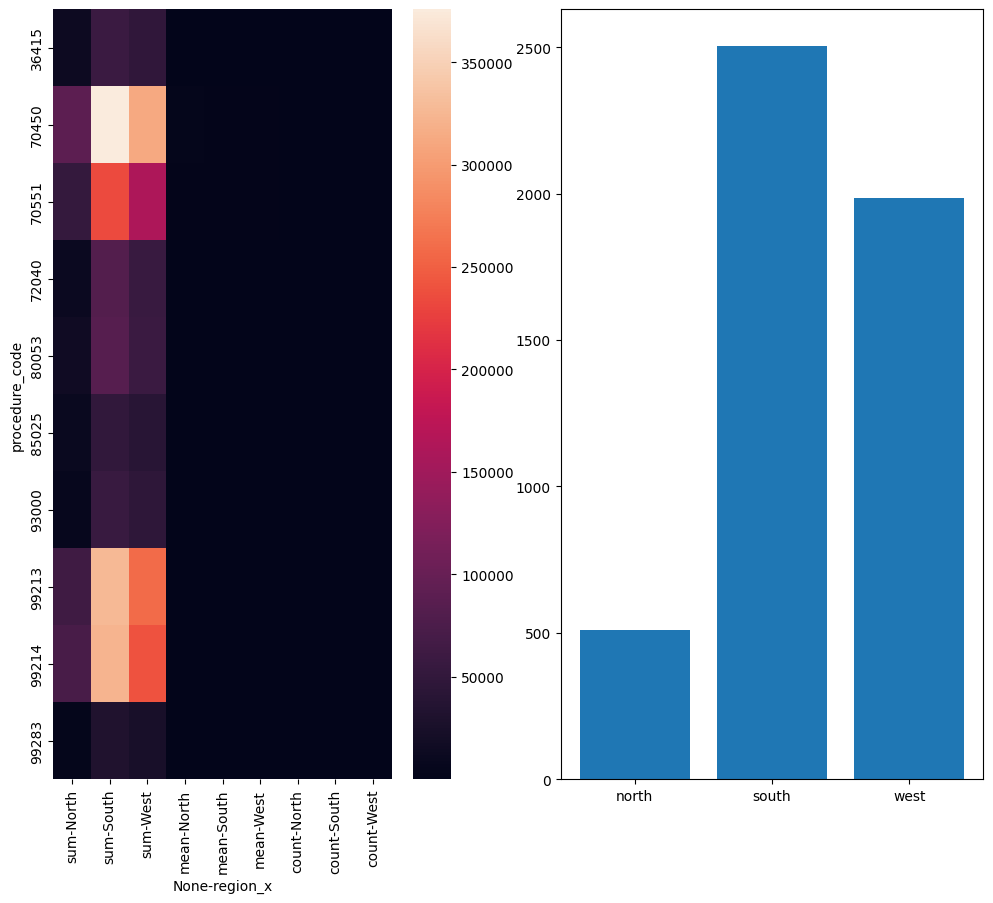

In [18]:
# TODO: Create heatmap from pivot table
# TODO: Create bar chart from pivot table
# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels
fig, axes = plt.subplots(1, 2, figsize= (12, 10))

sns.heatmap(pivot, ax = axes[0])
axes[1].bar(['north', 'south', 'west'], pivot['count'].sum())
# TODO: Save the plot as 'output/q3_pivot_visualization.png'

fig.savefig('output/q3_pivot_visualization.png')

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques